In [1]:
import numpy as np # use for linear algebra: matrix manipulation, calculation etc.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # used for image processing
import matplotlib.pyplot as plt #used to plot the data
import tensorflow as tf  #used for deep learning
from tensorflow.keras.models import Sequential #Simple deep learning model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D #different layout for learning model
from sklearn.model_selection import train_test_split
import os
from tqdm import tqdm
from PIL import Image
import glob

In [2]:
main_dir ="D:\Data Set\Our DataSet\Bangla Consonant";  

In [3]:
X = []
y = []

In [5]:
print("Reading data from folder......")
CATEGORIES = ["1","2","3","4","5","6","7","8","9","10"]
lbl = 0
for category in CATEGORIES: 
    
    path = os.path.join(main_dir,category)  # create path for each folder
    print(lbl)
    
    for img in glob.glob(path+"/*.jpg"):  # Read only bmp file 
        imgPath = os.path.join(path,img);  #create path for each image
        im = Image.open(imgPath).convert("L"); #convert RGB image to grayscale image
        imReshape = im.resize((50,50), Image.ANTIALIAS)
        img_array = np.asarray(imReshape);  # convert to array
        X.append(img_array)
        y.append(lbl)
        
    lbl = lbl + 1

Reading data from folder......
0
1
2
3
4
5
6
7
8
9


In [6]:
X = np.array(X).reshape(-1,50,50,1)
y = np.array(y)

In [7]:
#Normalize data
X = X/255.0

In [8]:
#split data into test & train data
print(X)
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.25, random_state = 0)

[[[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]
   ...
   [1.]
   [1.]
   [1.]]

  [[1.

In [9]:
print("Training the model......")
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = xTrain.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

Training the model......


In [10]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(10, activation='softmax')) #chnage the softmax to layer to your output size

In [11]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(xTrain, yTrain, epochs=15, batch_size=50, validation_split=0.3)

Epoch 1/15
17/17 [==============================] - 1s 87ms/step - loss: 2.3050 - accuracy: 0.1062 - val_loss: 2.2699 - val_accuracy: 0.1667
Epoch 2/15
17/17 [==============================] - 1s 75ms/step - loss: 2.2111 - accuracy: 0.2185 - val_loss: 2.0518 - val_accuracy: 0.3822
Epoch 3/15
17/17 [==============================] - 1s 74ms/step - loss: 1.9166 - accuracy: 0.4407 - val_loss: 1.6144 - val_accuracy: 0.5029
Epoch 4/15
17/17 [==============================] - 1s 75ms/step - loss: 1.4956 - accuracy: 0.5383 - val_loss: 1.2782 - val_accuracy: 0.6178
Epoch 5/15
17/17 [==============================] - 1s 76ms/step - loss: 1.1736 - accuracy: 0.6222 - val_loss: 1.0668 - val_accuracy: 0.6609
Epoch 6/15
17/17 [==============================] - 1s 75ms/step - loss: 0.9783 - accuracy: 0.6963 - val_loss: 0.9619 - val_accuracy: 0.6609
Epoch 7/15
17/17 [==============================] - 1s 76ms/step - loss: 0.7950 - accuracy: 0.7568 - val_loss: 0.8476 - val_accuracy: 0.7213
Epoch 8/15
17

In [12]:
print("Testing the model......")
#split data into train & test
predictions = model.predict(xTest)
predicted_val = [int(np.where(p == np.max(p))[0]) for p in predictions]
submission_df = pd.DataFrame({'id':yTest, 'label':predicted_val})
submission_df.to_csv("submission.csv", index=False)

Testing the model......


In [13]:
#evaluate model
from sklearn.metrics import accuracy_score
print("Accuracy is: %f %%" % (accuracy_score(yTest, predicted_val)*100))

Accuracy is: 87.305699 %


<AxesSubplot:>

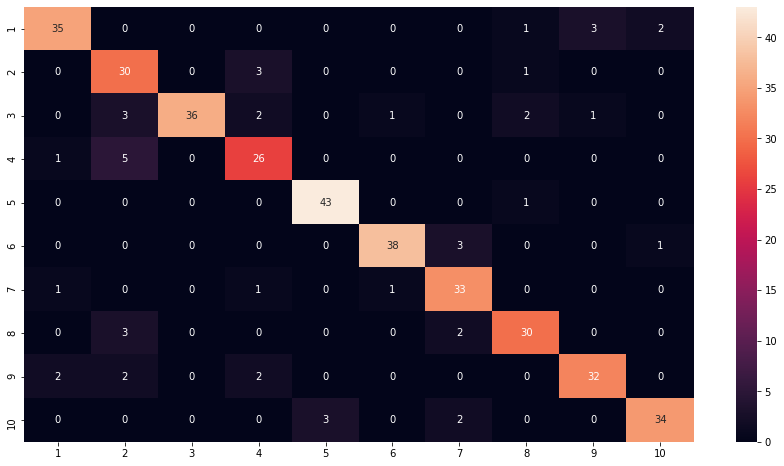

In [14]:
#draw confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(yTest, predicted_val)
cm_df = pd.DataFrame(cm,CATEGORIES,CATEGORIES)            
plt.figure(figsize=(15,8))  
sns.heatmap(cm_df, annot=True)